<a href="https://colab.research.google.com/github/accarter/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



# Write a Function

In [0]:
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):
  '''
  Calculates the probability of a positive result being accurate.

  Arguments: 
  (1) prob_drunk_driver: the probability that any given driver is drunk
  (2) false_positive_rate: the probability that someone who is not drunk tests positive
  (3) true_positive_rate: the probability that the someone who is drunk tests positive
  '''
  return prob_drunk_prior * true_positive_rate / (prob_drunk_prior + false_positive_rate * (1 - prob_drunk_prior))

What is the probability that a person is drunk after one positive breathalyzer test?

In [2]:
prob_after_first = prob_drunk_given_positive(0.001, 0.08, 1.0)
prob_after_first

0.012357884330202669

What is the probability that a person is drunk after two positive breathalyzer tests?

In [3]:
prob_after_second = prob_drunk_given_positive(prob_after_first, 0.08, 1.0)
prob_after_second

0.13525210993291495

How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

In [4]:
th = 0.95        # threshold
n = 0            # number of breathalyzer tests performed
p = 0.001        # prior probability
while (p <= th):
  p = prob_drunk_given_positive(p, 0.08, 1.0)   # set the posterior of the current test
                                                # as the prior for the next test
  n += 1
  print('Probability after test #{}: {:.4g}'.format(n,p))

Probability after test #1: 0.01236
Probability after test #2: 0.1353
Probability after test #3: 0.6616
Probability after test #4: 0.9607


Four tests are required to have a probability greater than 95% that someone is drunk beyond the legal limit.

# Explore `scipy.stats.bayes_mvs`

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [6]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'

column_headers = ['party','handicapped-infants','water-project',
                  'budget','physician-fee-freeze', 'el-salvador-aid',
                  'religious-groups','anti-satellite-ban',
                  'aid-to-contras','mx-missile','immigration',
                  'synfuels', 'education', 'right-to-sue','crime','duty-free',
                  'south-africa']

house = pd.read_csv(url, header=None, names=column_headers, na_values="?")
house.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [7]:
house = house.replace({
    'n': 0,
    'y': 1
})

house.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
def conf_int_freq(data, confidence=0.95):
  '''
  Calculate a confidence interval around a sample mean for the given data.
  Returns: mean, lower bound, upper bound
  '''
  xbar = np.mean(data)
  n = len(data)
  dof = n - 1
  stderr = np.std(data, ddof=1) / n ** 0.5
  lower, upper = stats.t.interval(confidence, dof, loc=xbar, scale=stderr)
  return (lower, upper)

def conf_int_bayes(data, confidence=0.95):
  '''
  Calculate a confidence interval for the given data using Bayesian inference.
  '''
  return stats.bayes_mvs(data, alpha=confidence)[0][1]

def support_bill_ci(sample, bill, f, confidence=0.95):
  '''
  Calculates a confidence interval of the percentage for which the members
  of the given sample are in favor of the specified bill.
  '''
  return f(sample[bill].dropna(), confidence)

rep = house[house['party'] == 'republican']
dem = house[house['party'] == 'democrat']

In [9]:
for bill in column_headers[1:]:
  for party in rep, dem:
    for f in conf_int_freq, conf_int_bayes:
      print(support_bill_ci(party, bill, f))

(0.12765166444807918, 0.24810591130949655)
(0.12765166444807918, 0.24810591130949655)
(0.5445926997425515, 0.6647096258388437)
(0.5445926997425515, 0.6647096258388437)
(0.42526571045979167, 0.5882478030537219)
(0.42526571045979167, 0.5882478030537219)
(0.43824514095228484, 0.5659389594661252)
(0.43824514095228484, 0.5659389594661252)
(0.0814352013169756, 0.1868574816098537)
(0.08143520131697565, 0.18685748160985363)
(0.8499435153340718, 0.9269795615890051)
(0.8499435153340716, 0.9269795615890052)
(0.9710067448304756, 1.0047508309271003)
(0.9710067448304756, 1.0047508309271003)
(0.026331861497208845, 0.08177624661089927)
(0.02633186149720885, 0.08177624661089927)
(0.91839794513717, 0.9846323578931331)
(0.9183979451371699, 0.9846323578931332)
(0.16486311399979725, 0.2665094350198106)
(0.1648631139997972, 0.26650943501981067)
(0.850987486003394, 0.9441932368881721)
(0.850987486003394, 0.9441932368881721)
(0.4153918266374824, 0.5380965454555409)
(0.41539182663748236, 0.5380965454555409)
(0

In [0]:
def display_error_bars(df, bill, title, ax):
  '''
  Display the confidence interval for the percentage of supporters
  on the specified bill.
  '''
  sample = df[bill].dropna()

  for i, conf_int in enumerate((conf_int_freq, conf_int_bayes)):
    lower, upper = conf_int(sample)
    mean = (lower + upper) / 2
    margin = (lower - upper) / 2
    ax.errorbar(i, mean, yerr=margin, fmt='o')

  ax.set(title=title)

def display_conf_ints(df, display):
  '''
  Display all confidence intervals for the Congressional House Votes dataframe.
  '''
  n_parties = house['party'].nunique()
  n_bills = len(column_headers) - 1
  n_plots = n_parties * n_bills

  fig, axes = plt.subplots(n_bills, n_parties, figsize=(10, 40))

  i = 0
  for party in house['party'].unique():
    for bill in column_headers[1:]:
      sample = house[house['party'] == party]
      title = '{}s in support of {} Bill'.format(party, bill.replace('-', ' ')).title()
      display(house[house['party'] == party],
              bill,
              title,
              axes[i % n_bills, i // n_bills])
      i += 1
  plt.tight_layout()

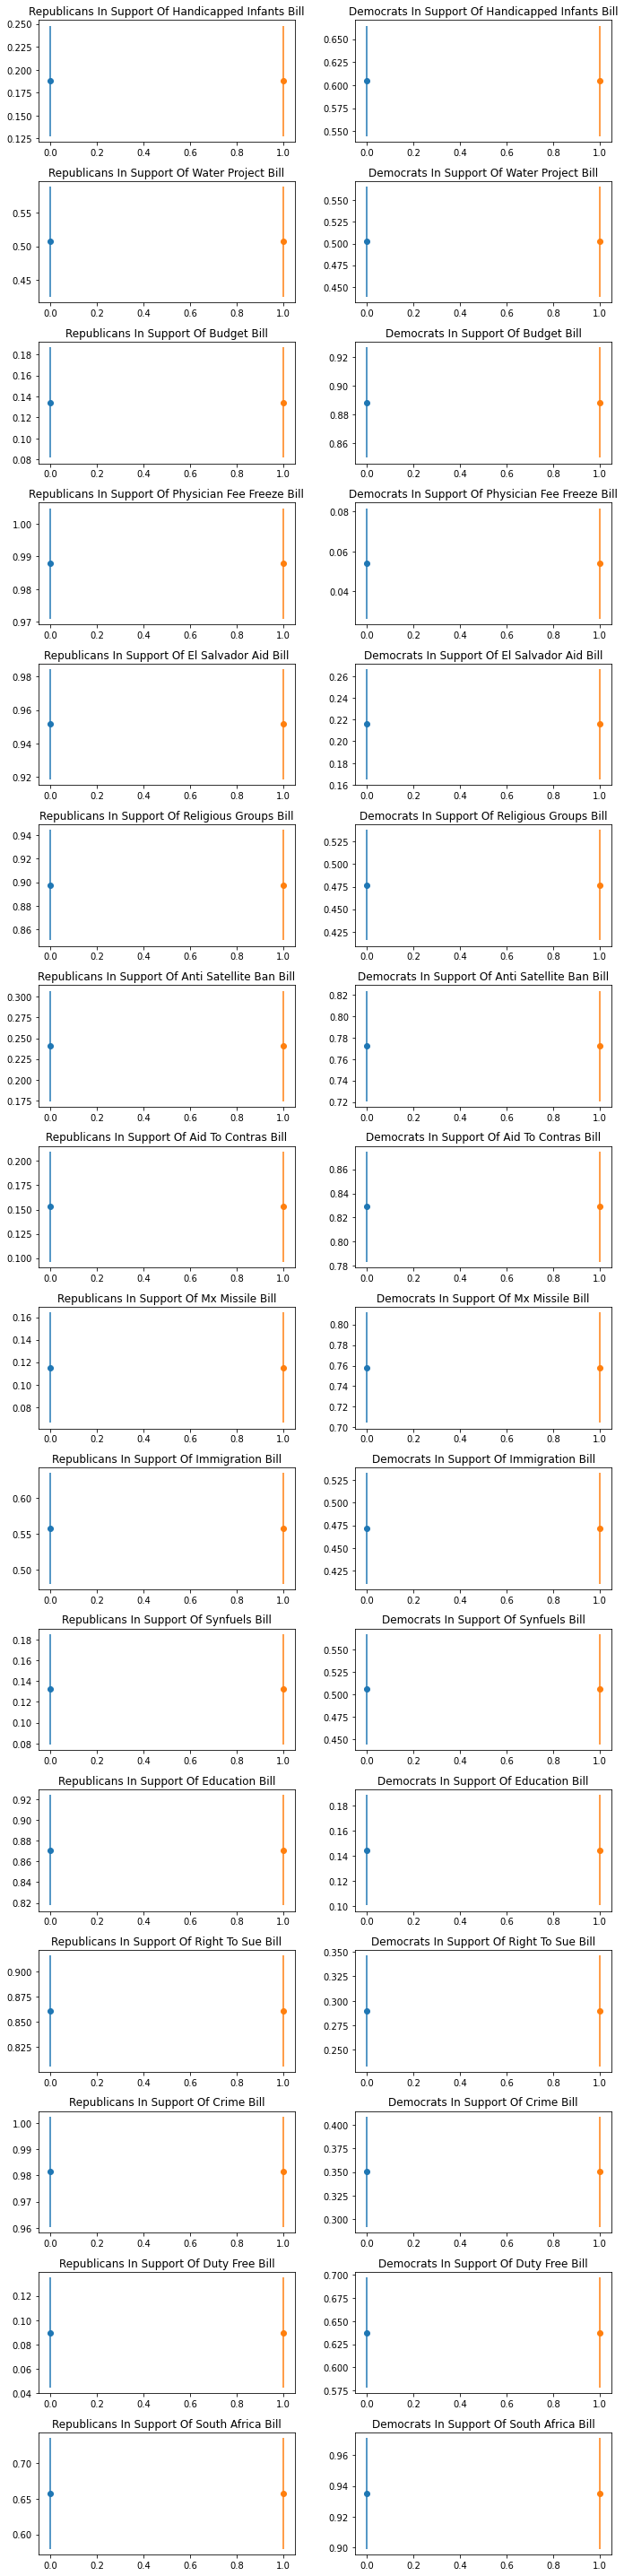

In [11]:
display_conf_ints(house, display_error_bars)

# Frequentist vs Bayesian statistics

Frequentist statistics makes no claim about the probability of a given event occurring before any tests are made or knowing some piece of information in advance.  Although probably a bit naive, one could say that frequentist statistics is unbiased while Bayesian statistics already has some beliefs before even looking at the data. The frequentist approach starts from a "blank slate" and makes inferences about the information provided from a hypothesis test without taking into consideration any previously acquired knowledge.

Bayesian statistics, on the other hand, makes assumptions based on prior knowledge and updates the probability of an event occurring based on new information.  In the case where there are two events, which are related in some way and are both known to have some likelihood of occurring given that the other event has also occurred, we would update our guess of whether or not a particular event will occurr if the other also occurs.

For the frequentist statistician, evidence *determines* beliefs; for the Bayesian statistician, evidence *updates* beliefs.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

# Apply a Bayesian technique to a problem you previously worked on

This example is used to demonstrate how Bayes's theorem can be applied to updating a belief based on new information.  In this case, we are updating our belief about the likelihood of a given member of congress voting in favor of a particular bill when provided information about their party affiliation.

The prior belief is simply the percentage out of the total members in congress who were in support of passing the bill.  If we know which party the congress member belongs to (new information), however, we can update our belief about the likelihood of voting in favor of the bill (posterior).


In [12]:
def prob_vote_given_party(bill, party):
  '''
  Calculates the probability that someone will vote for a given
  bill given that he or she belongs to a particular party.
  '''
  # votes from the specified party regarding the given bill
  data = house[house['party'] == party][bill]

  n_party_members = len(data)
  n_congress_members = house.shape[0]
  n_pro_bill_congress = house[bill].dropna().sum()
  n_pro_bill_party = data.dropna().sum()

  # P(A): prob. that a member of congress does support the bill
  prob_support_bill = n_pro_bill_congress / n_party_members

  # P(~A): prob. that a member of congress does not support the bill
  prob_against_bill = (n_congress_members - n_pro_bill_congress) / n_congress_members
  
  # P(B): prob. that a member of congress belongs to the party
  prob_party_member = n_party_members / n_congress_members

  # P(B|A): prob. that a party member does support the bill
  prob_member_given_support = n_pro_bill_party / n_party_members

  # P(B|~A): prob. that a party member does not support the bill
  prob_member_given_against = (n_party_members - n_pro_bill_party) / n_party_members

  num = prob_member_given_support * prob_support_bill
  denom = prob_member_given_support * prob_support_bill + prob_member_given_against * prob_against_bill

  return num / denom

border = '-' * 57
print('  Bill                   Prior     Republican  Democrat')
print(border)
for bill in column_headers[1:]:
  prior = house[bill].dropna().sum() / house.shape[0]
  bill_field = ' '.join(bill.split('-')).title()
  p_field = '{:^8.3f}'
  print(('| {:20} | ' + p_field + ' | ' + p_field + ' | ' + p_field + ' |')\
        .format(bill_field,
                prior,
                prob_vote_given_party(bill, 'democrat'),
                prob_vote_given_party(bill, 'republican')))
print(border)

  Bill                   Prior     Republican  Democrat
---------------------------------------------------------
| Handicapped Infants  |  0.430   |  0.633   |  0.306   |
| Water Project        |  0.448   |  0.519   |  0.629   |
| Budget               |  0.582   |  0.936   |  0.352   |
| Physician Fee Freeze |  0.407   |  0.058   |  0.983   |
| El Salvador Aid      |  0.487   |  0.287   |  0.972   |
| Religious Groups     |  0.625   |  0.699   |  0.971   |
| Anti Satellite Ban   |  0.549   |  0.856   |  0.488   |
| Aid To Contras       |  0.556   |  0.901   |  0.351   |
| Mx Missile           |  0.476   |  0.779   |  0.231   |
| Immigration          |  0.497   |  0.582   |  0.756   |
| Synfuels             |  0.345   |  0.445   |  0.163   |
| Education            |  0.393   |  0.141   |  0.873   |
| Right To Sue         |  0.480   |  0.362   |  0.911   |
| Crime                |  0.570   |  0.524   |  0.982   |
| Duty Free            |  0.400   |  0.619   |  0.136   |
| South Africa  